## Logging in Python

Logging is a means of tracking events that happen when some software runs. Logging is important for software developing, debugging, and running. If you don’t have any logging record and your program crashes, there are very few chances that you detect the cause of the problem. And if you detect the cause, it will consume a lot of time. With logging, you can leave a trail of breadcrumbs so that if something goes wrong, we can determine the cause of the problem. 

There are a number of situations like if you are expecting an integer, you have been given a float and you can a cloud API, the service is down for maintenance, and much more. Such problems are out of control and are hard to determine. 

## Why Printing is not a good option?

Some developers use the concept of printing the statements to validate if the statements are executed correctly or some error has occurred. 

But printing is not a good idea. It may solve your issues for simple scripts but for complex scripts, the printing approach will fail.

Python has a built-in module logging which allows writing status messages to a file or any other output streams. The file can contain the information on which part of the code is executed and what problems have been arisen.

## Levels of Log Message

There are five built-in levels of the log message.  

- Debug : These are used to give Detailed information, typically of interest only when diagnosing problems.

- Info : These are used to confirm that things are working as expected.

- Warning : These are used an indication that something unexpected happened, or is indicative of some problem in the near future.

- Error : This tells that due to a more serious problem, the software has not been able to perform some function.

- Critical : This tells serious error, indicating that the program itself may be unable to continue running.

If required, developers have the option to create more levels but these are sufficient enough to handle every possible situation. Each built-in level has been assigned its numeric value.

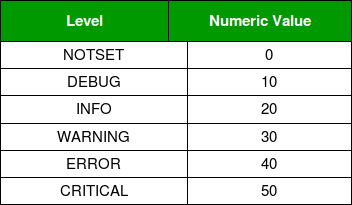

Logging module is packed with several features. It has several constants, classes, and methods. The items with all caps are constant, the capitalize items are classes and the items which start with lowercase letters are methods. 

There are several logger objects offered by the module itself.  

- Logger.info(msg) : This will log a message with level INFO on this logger.

- Logger.warning(msg) : This will log a message with a level WARNING on this logger.

- Logger.error(msg) : This will log a message with level ERROR on this logger.

- Logger.critical(msg) : This will log a message with level CRITICAL on this logger.

- Logger.log(lvl,msg) : This will Logs a message with integer level lvl on this logger.

- Logger.exception(msg) : This will log a message with level ERROR on this logger.

- Logger.setLevel(lvl) : This function sets the threshold of this logger to lvl. This means that all the messages below this level will be ignored.

- Logger.addFilter(filt) : This adds a specific filter filt into this logger.

- Logger.removeFilter(filt) : This removes a specific filter filt into this logger.

- Logger.filter(record) : This method applies the logger’s filter to the record provided and returns True if the record is to be processed. Else, it will return False.

- Logger.addHandler(hdlr) : This adds a specific handler hdlr to this logger.

- Logger.removeHandler(hdlr) : This removes a specific handler hdlr into this logger.

- Logger.hasHandlers() : This checks if the logger has any handler configured or not. 

## The Basics

Basics of using the logging module to record the events in a file are very simple. 

For that, simply import the module from the library.  

1. Create and configure the logger. It can have several parameters. But importantly, pass the name of the file in which you want to record the events.

2. Here the format of the logger can also be set. By default, the file works in append mode but we can change that to write mode if required.

3. Also, the level of the logger can be set which acts as the threshold for tracking based on the numeric values assigned to each level. There are several attributes which can be passed as parameters.

4. The list of all those parameters is given in Python Library. The user can choose the required attribute according to the requirement. After that, create an object and use the various methods as shown in the example.

In [157]:
# importing module
import logging
 
# Create and configure logger
logging.basicConfig(filename="newfile.log",
                    format='%(asctime)s %(message)s',
                    filemode='w')
 
# Creating an object
logger = logging.getLogger()
 
# Setting the threshold of logger to DEBUG
logger.setLevel(logging.DEBUG)
 
# Test messages
logger.debug("Harmless debug Message")
logger.info("Just an information")
logger.warning("Its a Warning")
logger.error("Did you try to divide by zero")
logger.critical("Internet is down")

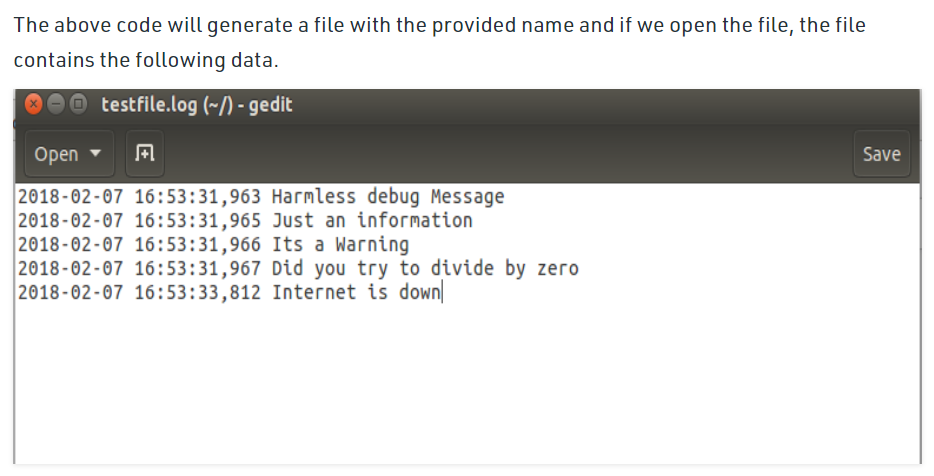

## Practice

1. Debug    (Detailed information about all processes)
2. Info     (Get some information and show it)
3. Warning  (Give warning to user, some library is deprecated)
4. Error    (Unable to proceed error)
5. Critical (Critical and needs immediate attention)

In [ ]:
import logging 
import os 
os.mkdir("logging")
os.listdir()

['.config', 'logging', 'sample_data']

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/logging/')

In [ ]:
import logging as lg

In [ ]:
lg.basicConfig(filename = "test.log" , level = lg.INFO , format = '%(asctime)s %(message)s')

In [ ]:
lg.info("i am going to start my program")

In [ ]:
os.listdir()

['test.log']

In [ ]:
lg.warning("this is a first warning of my program")

In [ ]:
f = open('test.log','r')
f.read()

'2021-07-29 14:13:33,112 this is a first warning of my program\n2021-07-29 14:13:35,674 this is an error message.\n2021-07-29 14:13:37,202 this is a critical message.\n2021-07-29 14:21:20,233 Error has occured.\n2021-07-29 14:21:20,233 division by zero\nTraceback (most recent call last):\n  File "<ipython-input-19-7371b97e3cb7>", line 3, in test\n    div = a/b\nZeroDivisionError: division by zero\n2021-07-29 14:22:45,030 Error has occured.\n2021-07-29 14:22:45,035 division by zero\nTraceback (most recent call last):\n  File "<ipython-input-22-4a5fefce355f>", line 4, in test\n    div = a/b\nZeroDivisionError: division by zero\n'

In [ ]:
f.close()

In [ ]:
lg.error("this is an error message.")

In [ ]:
lg.critical("this is a critical message.")

In [ ]:
def test(a,b):
  div = a/b
  return div

In [ ]:
test(10,0)

Please check logs for more information.


In [ ]:
def test(a,b):
  try:
    lg.info(str(a)+str(b))
    div = a/b
    return div
  except Exception as e:
    print("Please check logs for more information.")
    lg.error("Error has occured.")
    lg.exception(str(e))

In [ ]:
import logging as lg
lg.basicConfig(filename = "test2.log")
def test(a,b):
  logging.info("This is the start of a function.")
  return a + b

In [ ]:
test(5,15)

20

In [ ]:
os.getcwd()

'/content/logging'

In [ ]:
os.listdir()

['test.log']

In [ ]:
os.chdir('/content/logging/')

In [ ]:
os.listdir()

['test.log']

In [ ]:
logging.shutdown()

## Questions

1. Create a logger in your code
2. Create one function which can take any number of inputs as an argument and it will be able to return sum of it.
3. Capture user input in the log.
4. Give user instructions in the log file.
5. Read a log file from python and show all the log in console.

In [ ]:
import os
import logging as lg
os.getcwd()

'/content'

In [ ]:
os.listdir()

['.config', 'new.log', 'sample_data']

In [ ]:
lg.basicConfig(filename = "new.log", level=lg.INFO)

In [ ]:
def sample(*args):
  lg.info("Start of Function")
  sum = 0
  for i in args:
    lg.info(str(i))
    lg.warning(str(i))
    sum = sum + i
  lg.info("End of Function")
  return sum

In [ ]:
sample(1,100,200,322)

623

In [ ]:
f = open("new.log","r")
print(f.read())

INFO:root:1
INFO:root:100
INFO:root:200
INFO:root:322
INFO:root:444
INFO:root:5
INFO:root:6
INFO:root:76
INFO:root:7
INFO:root:78
INFO:root:88
INFO:root:8
INFO:root:88
INFO:root:8
INFO:root:8
INFO:root:8
INFO:root:1
INFO:root:100
INFO:root:200
INFO:root:322
INFO:root:444
INFO:root:5
INFO:root:6
INFO:root:76
INFO:root:7
INFO:root:78
INFO:root:88
INFO:root:8
INFO:root:88
INFO:root:8
INFO:root:8
INFO:root:8
INFO:root:Start of Function
INFO:root:1
INFO:root:100
INFO:root:200
INFO:root:322
INFO:root:Start of Function
INFO:root:1
INFO:root:100
INFO:root:200
INFO:root:322
INFO:root:End of Function



## Stream Handler in Python

- The StreamHandler call located in the core logging package, sends logging output to stream such as sys.stdout,  sys.stderr, or any file-like object which supports the write() and flush() method.

- Return a new instance of StreamHandler class. if the stream is specified, the instance will use it for logging output; otherwise sys.stderr will be used.

In [1]:
import logging
import os

In [2]:
logging.basicConfig(filename = "test3.log" , level = logging.DEBUG , format = '%(asctime)s %(levelname)s %(message)s')

In [3]:
os.listdir()

['.config', 'test3.log', 'sample_data']

In [4]:
console_log = logging.StreamHandler()
console_log.setLevel(logging.INFO)

In [5]:
format = '%(asctime)s %(levelname)s %(message)s'

In [6]:
console_log.setFormatter(format)

In [7]:
logging.getLogger('').addHandler(console_log)

In [8]:
logging.info("This is my first test code for log.")

%(asctime)s %(levelname)s %(message)s


In [9]:
logger1 = logging.getLogger('logger1.area1')
logger2 = logging.getLogger('logger2.area2')

In [10]:
logger1.info("this is info for logger one")
logger2.debug("this is a debug for logger two")
logger2.info("this is a info for logger two")

%(asctime)s %(levelname)s %(message)s
%(asctime)s %(levelname)s %(message)s


In [11]:
f = open("test3.log","r")
print(f.read())

2021-07-31 06:24:30,502 INFO This is my first test code for log.
2021-07-31 06:27:47,326 INFO this is info for logger one
2021-07-31 06:27:47,329 DEBUG this is a debug for logger two
2021-07-31 06:27:47,329 INFO this is a info for logger two



In [5]:
# Everything together

import logging
import os

logging.basicConfig(filename = "test3.log" , level = logging.DEBUG , format = '%(asctime)s - %(name)s - %(levelname)s -  %(message)s', filemode = 'w')
console_log = logging.StreamHandler()
console_log.setLevel(logging.INFO)
format = '%(asctime)s %(name)s %(levelname)s %(message)s'
console_log.setFormatter(format)
logging.getLogger('').addHandler(console_log)
logging.info("This is my first test code for log.")
logger1 = logging.getLogger('user1')
logger2 = logging.getLogger('user2')
a = logging.getLogger('user1')
b = logging.getLogger('user2')

logger1.info("this is info for logger one")
logger2.debug("this is a debug for logger two")
logger2.info("this is a info for logger two")
a.error("this is an error for user 1")
b.critical("this is a critical error for user 2")

%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s


In [6]:
f = open("test3.log","r")
print(f.read())

2021-07-31 07:18:08,289 root INFO This is my first test code for log.
2021-07-31 07:18:08,303 user1 INFO this is info for logger one
2021-07-31 07:18:08,308 user2 DEBUG this is a debug for logger two
2021-07-31 07:18:08,308 user2 INFO this is a info for logger two
2021-07-31 07:18:08,313 matplotlib.pyplot DEBUG Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2021-07-31 07:23:44,925 root INFO This is my first test code for log.
2021-07-31 07:23:44,930 user1 INFO this is info for logger one
2021-07-31 07:23:44,937 user2 DEBUG this is a debug for logger two
2021-07-31 07:23:44,937 user2 INFO this is a info for logger two
2021-07-31 07:23:44,941 user1 ERROR this is an error for user 1
2021-07-31 07:23:44,946 user2 CRITICAL this is a critical error for user 2
2021-07-31 07:33:28,904 root INFO This is my first test code for log.
2021-07-31 07:33:28,918 user1 INFO this is info for logger one
2021-07-31 07:33:28,931 user2 DEBUG this is a debug for logger two
2021-07-31 

In [1]:
# Everything together modified

import logging
import os

logging.basicConfig(filename = "test3.log" , level = logging.DEBUG , format = '%(asctime)s - %(name)s - %(levelname)s -  %(message)s')

# Create Handlers
console_log = logging.StreamHandler()
console_log.setLevel(logging.DEBUG)
format = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
console_log.setFormatter(format)

# Create a Custom Handler
logging.getLogger('').addHandler(console_log)
logging.info("main log")
logger1 = logging.getLogger('user1')
logger2 = logging.getLogger('user2')

logger1.info("this from user1 info")
logger2.debug("this is from user1 debug")
logger2.info("this is from user2 info")

2021-07-31 07:43:41,795 - root - INFO - main log
2021-07-31 07:43:41,806 - user1 - INFO - this from user1 info
2021-07-31 07:43:41,811 - user2 - DEBUG - this is from user1 debug
2021-07-31 07:43:41,816 - user2 - INFO - this is from user2 info
2021-07-31 07:43:41,825 - matplotlib.pyplot - DEBUG - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
f = open("test3.log","r")
print(f.read())

2021-07-31 07:43:41,795 - root - INFO -  main log
2021-07-31 07:43:41,806 - user1 - INFO -  this from user1 info
2021-07-31 07:43:41,811 - user2 - DEBUG -  this is from user1 debug
2021-07-31 07:43:41,816 - user2 - INFO -  this is from user2 info
2021-07-31 07:43:41,825 - matplotlib.pyplot - DEBUG -  Loaded backend module://ipykernel.pylab.backend_inline version unknown.



## Practice

In [3]:
def testdebug():
  l = []
  for i in range(10):
    l.append(i)
    print("we have appended your data in our list.")
  return l

In [4]:
testdebug()

we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
import ipdb

ModuleNotFoundError: ignored

## Python Debugger – Python pdb

- https://www.geeksforgeeks.org/python-debugger-python-pdb/

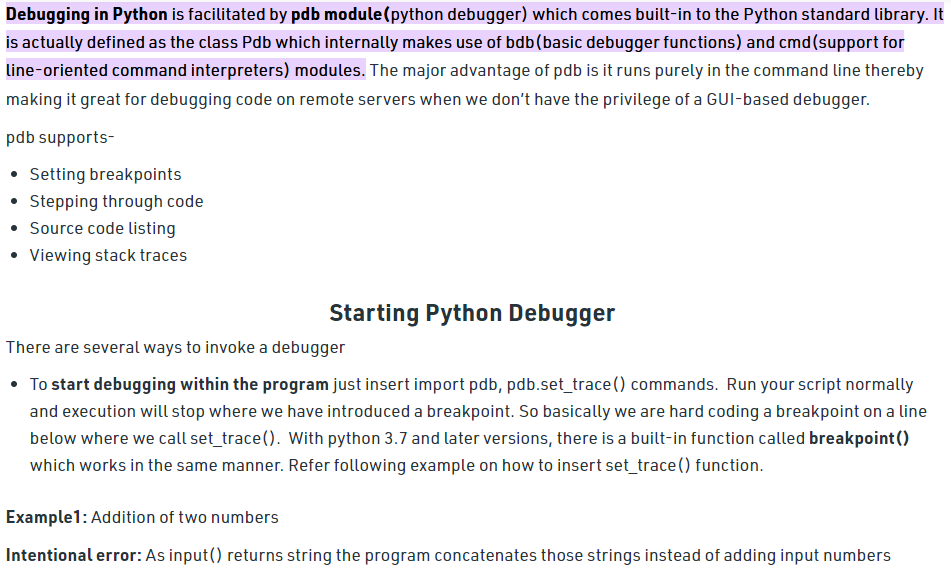
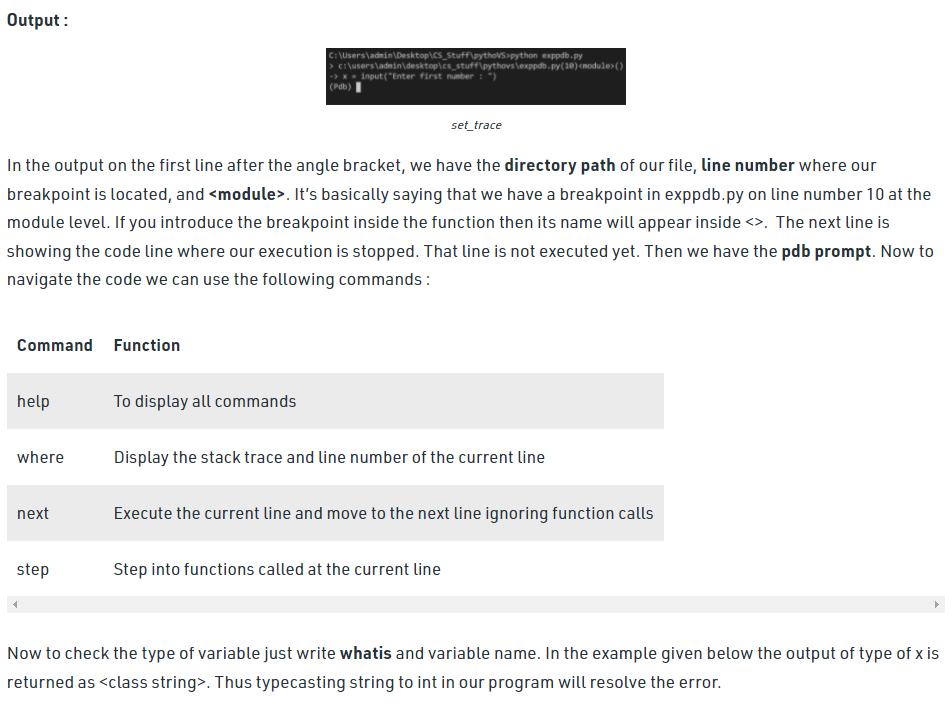
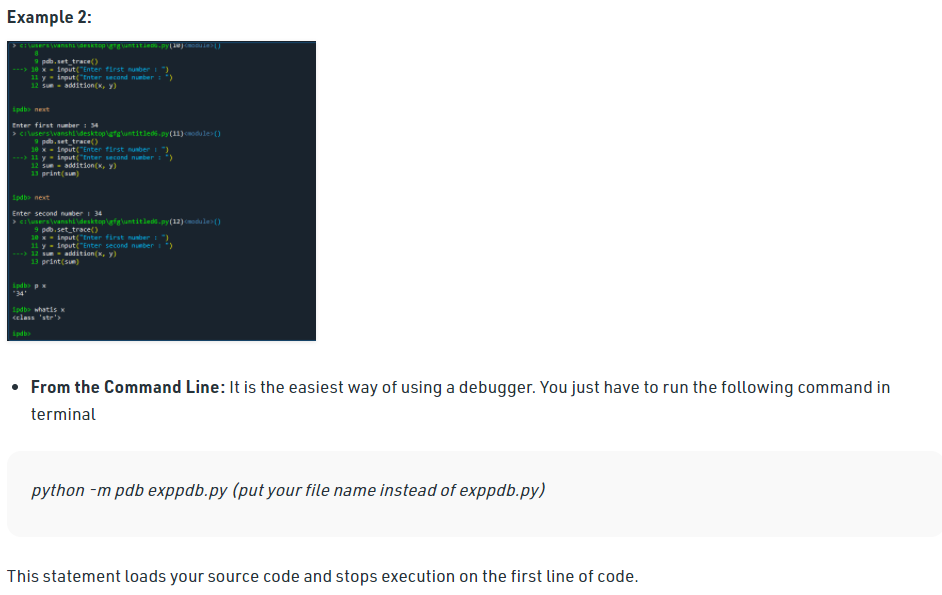
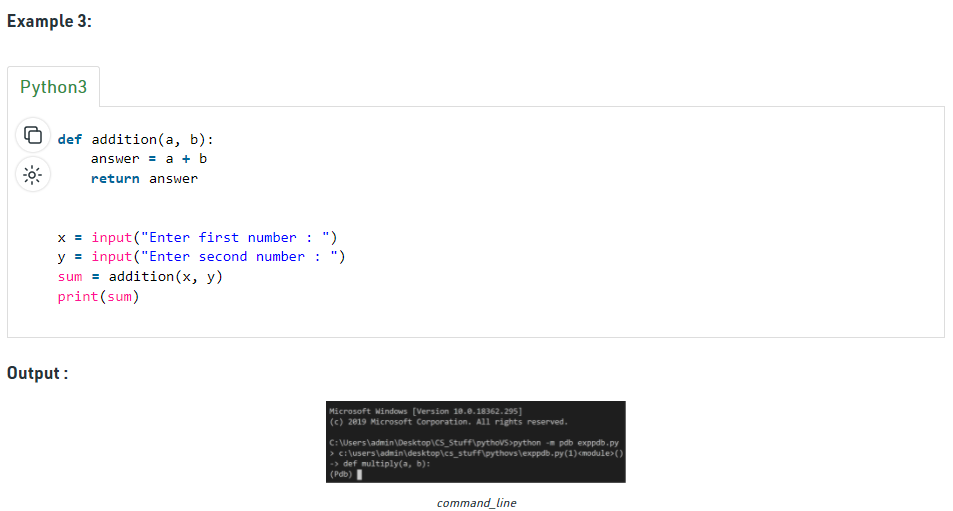
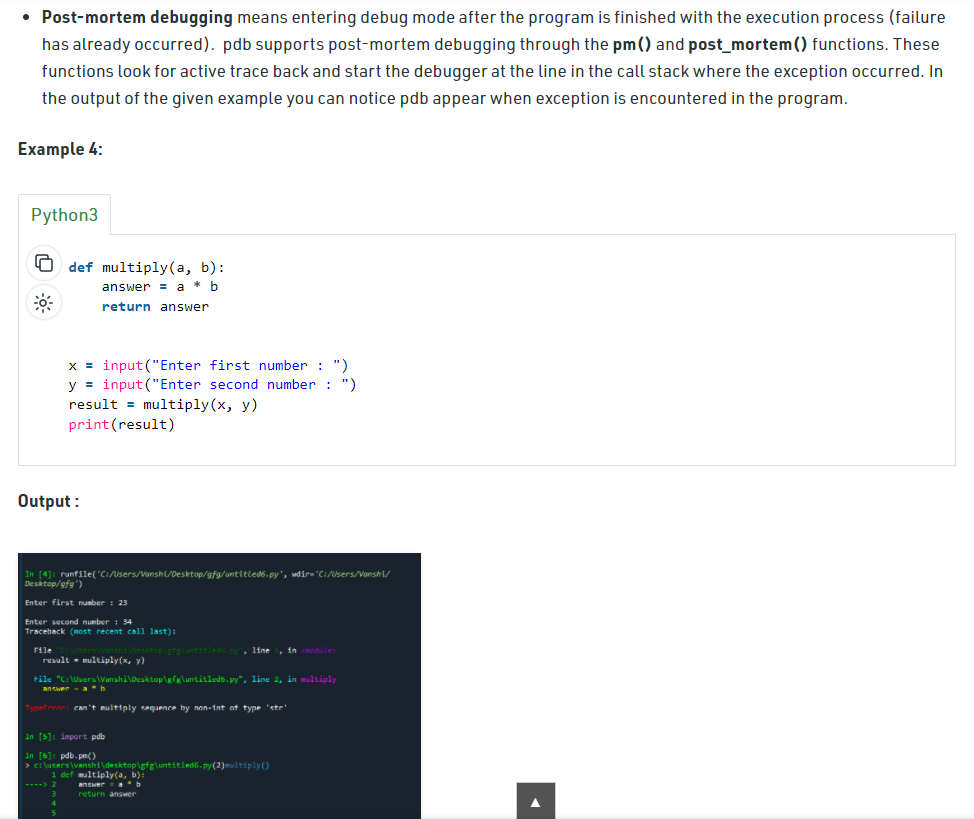
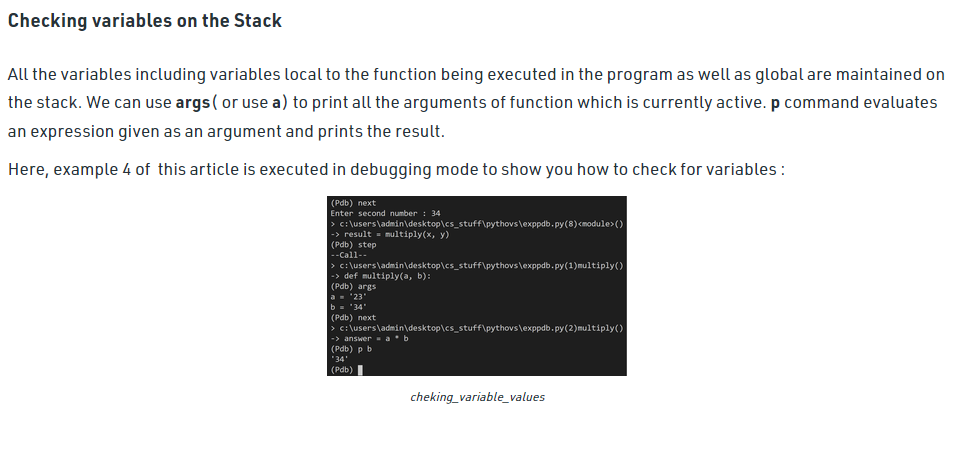
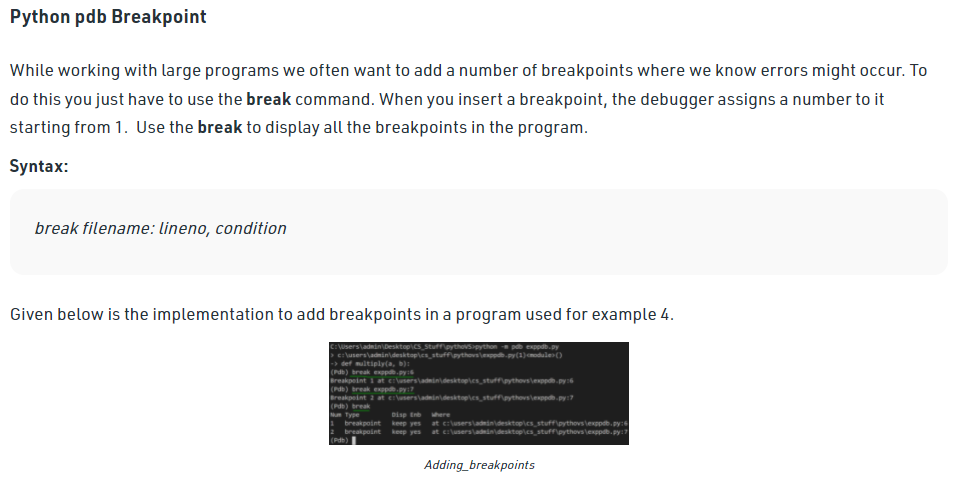
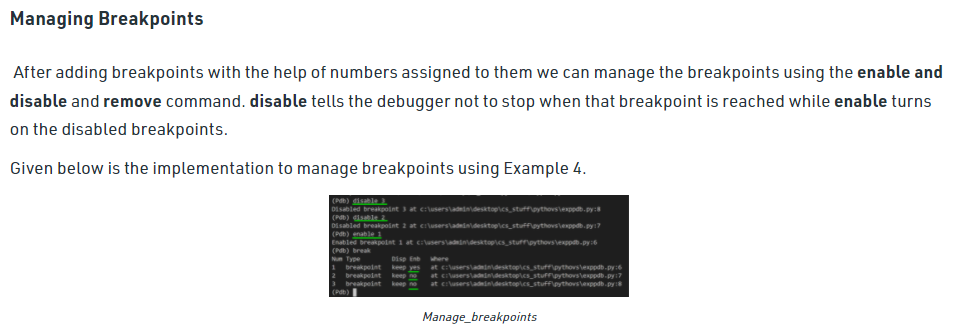

In [158]:
import pdb
  
  
def addition(a, b):
    answer = a + b
    return answer
  
  
pdb.set_trace()
x = input("Enter first number : ")
y = input("Enter second number : ")
sum = addition(x, y)
print(sum)

--Return--
None
> <ipython-input-158-3d56995cd368>(9)<module>()
      7 
      8 
----> 9 pdb.set_trace()
     10 x = input("Enter first number : ")
     11 y = input("Enter second number : ")

ipdb> next
    [... skipped 1 hidden frame]

    [... skipped 1 hidden frame]

    [... skipped 1 hidden frame]

    [... skipped 1 hidden frame]

> c:\programdata\anaconda3\lib\site-packages\ipython\core\interactiveshell.py(3349)run_ast_nodes()
   3347                     to_run.append((node, 'single'))
   3348 
-> 3349                 for node,mode in to_run:
   3350                     if mode == 'exec':
   3351                         mod = Module([node], [])

ipdb> next
> c:\programdata\anaconda3\lib\site-packages\ipython\core\interactiveshell.py(3350)run_ast_nodes()
   3348 
   3349                 for node,mode in to_run:
-> 3350                     if mode == 'exec':
   3351                         mod = Module([node], [])
   3352                     elif mode == 'single':

ipdb> next
> 

In [2]:
!pip install ipdb

     |████████████████████████████████| 786 kB 13.3 MB/s 
     |████████████████████████████████| 368 kB 63.5 MB/s 
  Created wheel for ipdb: filename=ipdb-0.13.9-py3-none-any.whl size=11648 sha256=da8f83ec695b487bbf638ccab730af75bb5d72a442c6bea642765bdb18ae9623
  Stored in directory: /root/.cache/pip/wheels/65/cd/cc/aaf92acae337a28fdd2aa4d632196a59745c8c39f76eaeed01
Successfully built ipdb
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit

In [3]:
import ipdb

In [4]:
def testdebug():
  ipdb.set_trace()
  l = []
  for i in range(10):
    l.append(i)
    print("we have appended your data in our list.")
  return l

In [5]:
testdebug()


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.7/bdb.py", line 332, in set_trace
    sys.settrace(self.trace_dispatch)



> <ipython-input-4-e47590c67bc8>(3)testdebug()
      2   ipdb.set_trace()
----> 3   l = []
      4   for i in range(10):

ipdb> h

Documented commands (type help <topic>):
EOF    commands   enable    ll        pp       s                until 
a      condition  exit      longlist  psource  skip_hidden      up    
alias  cont       h         n         q        skip_predicates  w     
args   context    help      next      quit     source           whatis
b      continue   ignore    p         r        step             where 
break  d          interact  pdef      restart  tbreak         
bt     debug      j         pdoc      return   u              
c      disable    jump      pfile     retval   unalias        
cl     display    l         pinfo     run      undisplay      
clear  down       list      pinfo2    rv       unt            

Miscellaneous help topics:
exec  pdb

ipdb> next
> <ipython-input-4-e47590c67bc8>(4)testdebug()
      3   l = []
----> 4   for i in range(10):
      5     l.


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.7/bdb.py", line 343, in set_continue
    sys.settrace(None)



we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [1]:
def testdebug():
  l = []
  for i in range(10):
    for j in range(5):
      l.append(i)
      print("we have appended your data in our list.")
  return l

In [2]:
testdebug()

we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.
we have appended your data in our list.


[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9]

## Practice

In [ ]:
def testdebug():
  l = []
  for i in range(10):
    for j in range(5):
      l.append(i)
      print("we have appended your data in our list.")
  return l